In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('..')
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from src.model.HMM.HMM import HMM
from src.model.HMM.data import train_test_split, get_dataset

In [3]:
curr_dir = os.getcwd()
exe_path = 'data/processed/hmm_data.csv'
path = os.path.join(curr_dir, exe_path)
X, y = get_dataset(exe_path)
X_train, y_train, X_test, y_test = train_test_split(X, y)
model = HMM()
model.fit(X_train, y_train)

In [4]:
cts = model.get_counts_matrix()
cts = sorted(cts.items(), key = lambda x: x[1], reverse = True)
top_10 = cts[:11]
del top_10[6] # Delete ApplicationFrameHost.exe
top_10_list = [x[0] for x in top_10]

In [5]:
import numpy as np
z = np.array([1,1,1])
x = np.array([[1,3,1], [0,0,-1], [-1,-1,1]])
alpha = np.array([0.5, 0, -0.25])
gamma = 0.25
res = 0
for i in range(len(z)):
    temp_res = alpha[i] * np.exp(-gamma * np.linalg.norm(x[i] - z))
    res += temp_res
    print(res, temp_res)
print(res.round(2))

0.3032653298563167 0.3032653298563167
0.3032653298563167 0.0
0.17999815700750676 -0.12326717284880995
0.18


In [6]:
t = model.get_transition_matrix()

In [7]:
most_frequent_apps = dict()
for exe in top_10_list:
    top_4_prob = []
    i = 0
    for p in t[exe].items():
        if i == 4:
            break
        top_4_prob.append(p)
        i += 1
    most_frequent_apps[exe] = dict(top_4_prob)

In [8]:
y_axis = set([y for x in most_frequent_apps.values() for y in x.keys()])
x_axis = most_frequent_apps.keys()

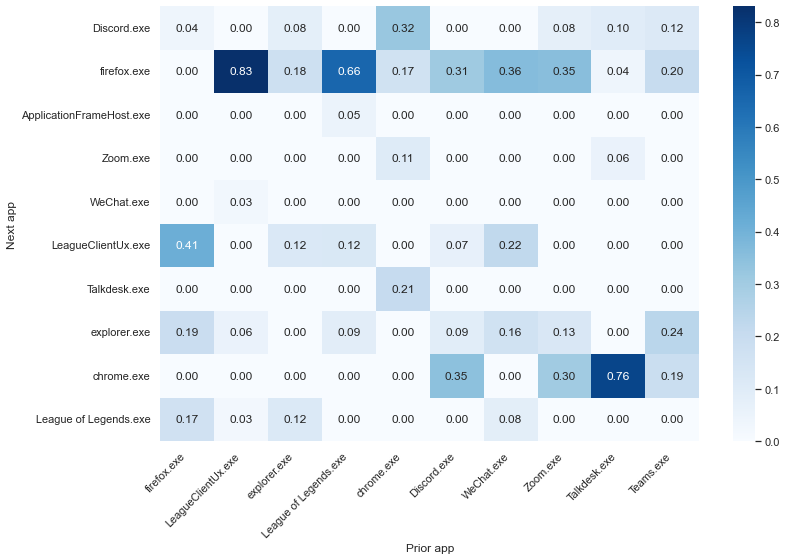

In [9]:
df = pd.DataFrame(index = y_axis, data = most_frequent_apps)
df = df.fillna(0)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.heatmap(df, cmap = 'Blues', annot=True, fmt='.2f')
x_labels = ax.get_xticklabels()
plt.setp(x_labels, rotation=45, horizontalalignment='right')
plt.xlabel('Prior app')
plt.ylabel('Next app')
plt.subplots_adjust(left=0.1, bottom=0.15)
plt.show()

### Top-1 accuracy

In [13]:
pred_1 = model.predict(X_test)
accuracy_1 = model.evaluate(pred_1, y_test)
accuracy_1

0.44770544290288156

### Top-2 accuracy

In [14]:
pred_2 = model.predict(X_test, top=2)
accuracy_2 = model.evaluate(pred_2, y_test)
accuracy_2

0.62059765208111

### Top-3 accuracy

In [15]:
pred_3 = model.predict(X_test, top=3)
accuracy_3 = model.evaluate(pred_3, y_test)
accuracy_3

0.7475987193169691